In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from lbn import LBN, LBNLayer
from sklearn.model_selection import train_test_split
from tensorflow import keras  
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout 
from tensorflow.keras.layers import Activation 
from tensorflow.keras.layers import LeakyReLU  
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.client import device_lib


In [2]:
file_name = "./TRAIN_DATA.pkl"
objects = pd.read_pickle(file_name)
objects

event_number  tau_0_n_charged_tracks     tau_0_pt  tau_0_eta  \
DiBoson   0         51501305                       1    61.196223   0.597434   
          1         51840911                       3    50.513039   0.735092   
          2         51843660                       1    65.117453   0.790218   
          3         51843204                       1    66.388078   1.580813   
          4         51742600                       3    41.767187   0.771101   
...                      ...                     ...          ...        ...   
Hplus3000 3389        119212                       1   596.653438   0.126293   
          3390        110937                       1   258.894719   2.105565   
          3391        119615                       1   621.742500  -0.437455   
          3392        110288                       1  1191.337625  -0.845155   
          3393        119768                       3   752.355750   0.671846   

                tau_0_phi      tau_0_E    lep_0_pt  lep_0_eta  lep_0_phi  \
DiBoson   0     -1.977407    72.446254  301.454469   0.172820  -1.838867   
          1      0.232820    64.786385   64.118320   2.174325   1.505945   
          2     -1.260932    86.528807   53.415461   0.405626  -2.715441   
          3      1.166146   168.118262   90.245320   1.002049  -0.213378   
          4     -2.810712    54.812115   87.059977  -0.170727   0.485725   
...                   ...          ...         ...        ...        ...   
Hplus3000 3389  -1.263547   601.418059   64.177766  -0.198520   2.394535   
          3390   2.336684  1078.752247  221.454000   0.973893  -2.148421   
          3391  -1.300927   682.187816   41.723176  -0.124043  -0.690370   
          3392   0.362451  1642.753473   89.843414   0.188039  -0.349078   
          3393  -2.122138   928.637679   51.295402  -2.115407  -1.871007   

                    lep_0_E  ...       met_et   met_phi    jet_0_pt  \
DiBoson   0    -1429.018434  ...   534.690640 -2.265688  663.821178   
          1      193.673980  ...    63.118486 -0.876949   85.809632   
          2      -82.565721  ...    53.797857 -1.081396   80.877150   
          3     -172.916212  ...   178.463286  0.623175  289.288980   
          4       14.393968  ...   107.690736 -2.699284   36.343672   
...                     ...  ...          ...       ...         ...   
Hplus3000 3389   -90.250865  ...   449.175178  1.876827   86.514969   
          3390   -85.222468  ...   314.546626  0.062025   80.576204   
          3391  -143.414827  ...   908.113473  2.090620  183.566396   
          3392   -12.475519  ...  1359.542498 -2.898113   99.026488   
          3393  -266.834575  ...   930.570381  0.941724  190.064110   

                jet_0_eta  jet_0_phi      jet_0_E    jet_1_pt  tau_0_upsilon  \
DiBoson   0     -1.396944   1.065721  1429.018434  184.642058       0.174792   
          1      0.335477  -3.015623    91.970860    0.000000    -999.000000   
          2      0.149096   2.300846    82.565721   63.739704      -0.415216   
          3      0.390864  -2.675885   312.389695    0.000000       0.510501   
          4     -1.332182  -0.152594    73.937954   35.537092    -999.000000   
...                   ...        ...          ...         ...            ...   
Hplus3000 3389  -0.233460   1.632966    90.250865   45.878381       0.621303   
          3390   0.317162  -2.722354    85.222468   74.464942      -0.103666   
          3391   0.128720  -1.227407   185.459539  129.766914       0.310872   
          3392  -0.303999  -0.974948   103.912057   90.229440      -0.570558   
          3393  -1.583442  -1.398646   482.622774   83.403780    -999.000000   

                  weight  class_label  
DiBoson   0     0.025781          0.0  
          1     0.029348          0.0  
          2     0.008090          0.0  
          3     0.022966          0.0  
          4     0.022252          0.0  
...                  ...          ...  
Hplus3000 3389  0.909109          1.0  
        

In [3]:
objects.keys()

Index(['event_number', 'tau_0_n_charged_tracks', 'tau_0_pt', 'tau_0_eta',
       'tau_0_phi', 'tau_0_E', 'lep_0_pt', 'lep_0_eta', 'lep_0_phi', 'lep_0_E',
       'bjet_0_pt', 'bjet_0_eta', 'bjet_0_phi', 'bjet_0_E', 'met_et',
       'met_phi', 'jet_0_pt', 'jet_0_eta', 'jet_0_phi', 'jet_0_E', 'jet_1_pt',
       'tau_0_upsilon', 'weight', 'class_label'],
      dtype='object')

In [4]:
# df_sig_all = objects[objects.class_label.eq(1)]
# df_sig_all

# df_bkg_all = objects[objects.class_label.eq(0)]
# df_bkg_all

# df_sig = df_sig_all.loc["Hplus200"]
# df_sig

# df_bkg = df_bkg_all.loc["DiBoson"]
# df_bkg

In [5]:
data_subset = [objects.loc["Hplus200"], objects.loc["DiBoson"]]
df = pd.concat(data_subset, ignore_index=True).sample(frac=1).reset_index(drop=True)
df

,event_number,tau_0_n_charged_tracks,tau_0_pt,tau_0_eta,tau_0_phi,tau_0_E,lep_0_pt,lep_0_eta,lep_0_phi,lep_0_E,...,met_et,met_phi,jet_0_pt,jet_0_eta,jet_0_phi,jet_0_E,jet_1_pt,tau_0_upsilon,weight,class_label
0,74667,1,96.999977,-0.475486,0.460546,108.173336,125.634641,0.159651,-2.604488,-104.264613,...,81.961934,2.210967,74.596684,-0.855407,1.202020,104.264613,54.248324,0.973342,0.489459,1.0
1,85718,1,58.206738,2.217442,0.874034,270.448705,169.861953,0.138263,-1.946281,-127.553341,...,242.489619,1.522239,170.114467,0.713684,-1.748613,215.453177,63.101104,0.972315,0.199851,1.0
2,89483,1,48.392664,1.275690,-0.532282,93.407782,44.976770,-0.431300,0.007022,-75.169851,...,118.846587,-2.039448,94.678685,-0.764873,1.564084,124.395267,35.621055,0.444790,-0.276671,1.0
3,31635683,1,30.569262,1.085714,-2.120075,50.427276,63.815445,0.862234,-2.702457,-129.623358,...,68.310675,-1.710728,112.171289,0.536600,0.852280,129.623358,0.000000,0.344179,0.018562,0.0
4,93253,3,105.809828,-0.682702,1.494330,131.440616,47.704719,0.596062,2.912840,-41.647832,...,67.539266,-0.799183,56.981474,-1.134834,-1.534624,98.081042,0.000000,-999.000000,-0.365478,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7428,41018842,1,31.009221,1.931043,2.812311,109.178803,49.422652,0.797257,1.225273,5.089593,...,189.701759,-2.820527,116.087334,1.255167,-0.104387,220.675219,43.110198,1.010107,0.024329,0.0
7429,107576,3,109.069430,-0.711182,0.828608,137.834365,146.380125,-0.825187,-2.227634,86.924907,...,127.557512,0.611638,81.632194,-0.834658,-2.832365,112.185748,28.989735,-999.000000,-0.490576,1.0
7430,119256,3,57.296043,0.800959,0.458006,76.678585,64.267254,0.673899,-1.826890,38.813166,...,117.167606,2.560972,55.337535,1.666749,-0.193653,152.052841,34.635209,-999.000000,0.492409,1.0
7431,113532,3,96.524000,0.782142,0.991271,127.584202,97.491367,0.798900,-2.413474,14.643843,...,154.721988,0.095281,109.324050,-0.336161,-2.878988,115.649374,34.617631,-999.000000,0.319652,1.0


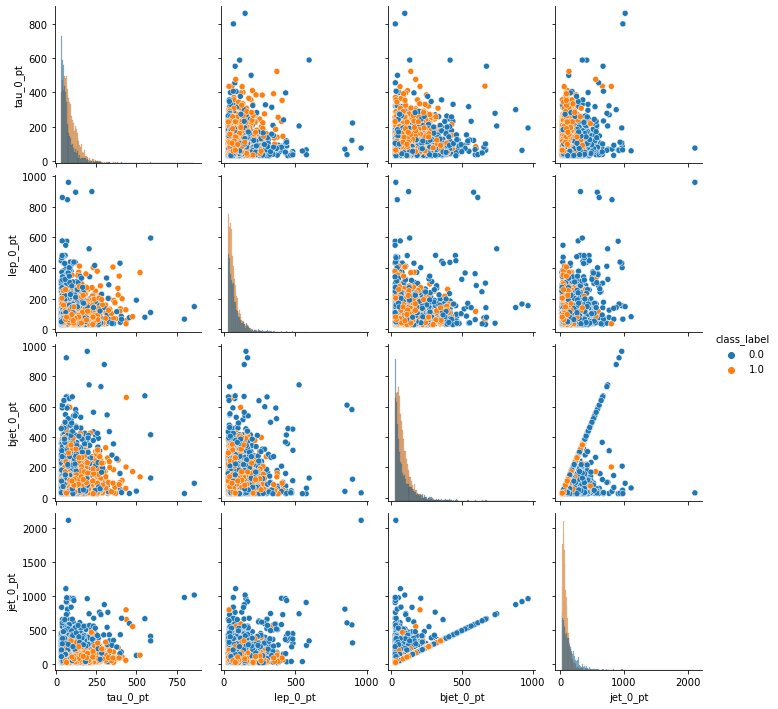

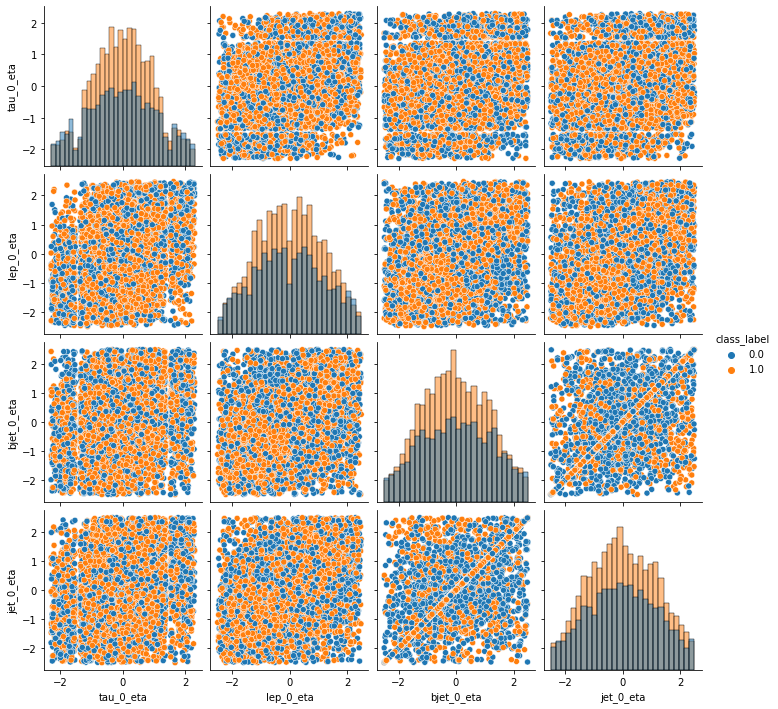

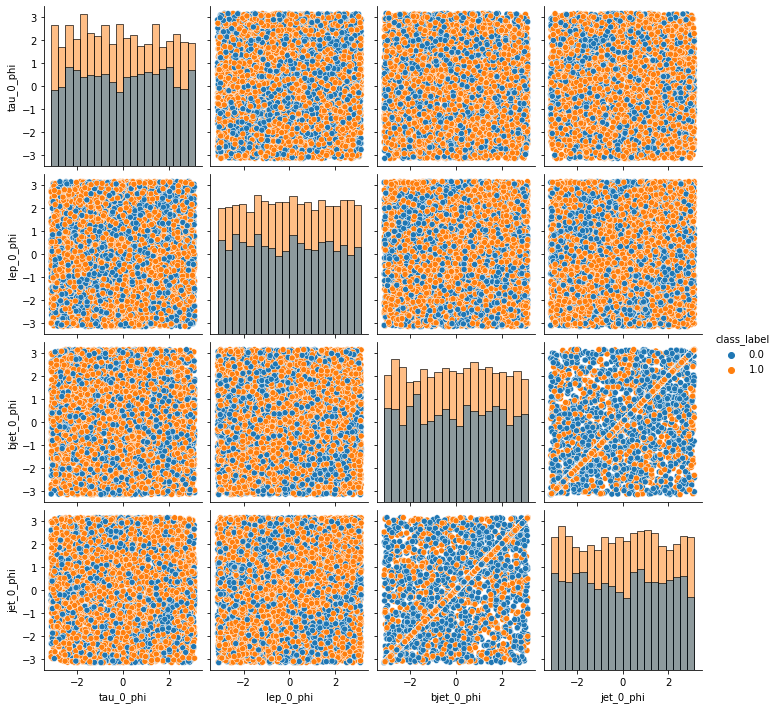

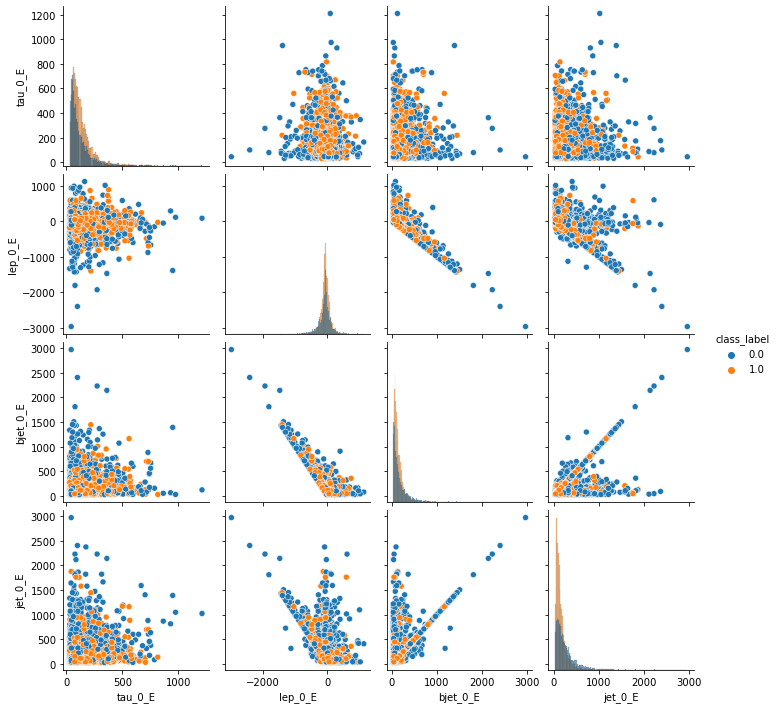

In [6]:
sns.pairplot(df, vars=['tau_0_pt', 'lep_0_pt', 'bjet_0_pt', 'jet_0_pt'], hue='class_label', diag_kind='hist')
sns.pairplot(df, vars=['tau_0_eta', 'lep_0_eta', 'bjet_0_eta', 'jet_0_eta'], hue='class_label', diag_kind='hist')
sns.pairplot(df, vars=['tau_0_phi', 'lep_0_phi', 'bjet_0_phi', 'jet_0_phi'], hue='class_label', diag_kind='hist')
sns.pairplot(df, vars=['tau_0_E', 'lep_0_E', 'bjet_0_E', 'jet_0_E'], hue='class_label', diag_kind='hist')


In [8]:
vectors = []
for i in df.index:
    vectors.append( [ df['tau_0_pt'][i], df['tau_0_eta'][i], df['tau_0_phi'][i], df['tau_0_E'][i],
                  df['lep_0_pt'][i], df['lep_0_eta'][i], df['lep_0_phi'][i], df['lep_0_E'][i],
                  df['bjet_0_pt'][i], df['bjet_0_eta'][i], df['bjet_0_phi'][i], df['bjet_0_E'][i],
                  df['met_et'][i], 0, df['met_phi'][i], 0,
                  df['jet_0_pt'][i], df['jet_0_eta'][i], df['jet_0_phi'][i], df['jet_0_E'][i],
                  df['jet_1_pt'][i], 0, 0, 0,
                  df["class_label"][i]] )
PtEtaPhiE = np.array(vectors)


In [9]:
PtEtaPhiE.shape

(7433, 25)

In [20]:
pd.DataFrame(PtEtaPhiE).to_csv("PtEtaPhiE.csv")

On Tier3 run LBN_Vector_Conversion.py:

```python
"""
import ROOT
import csv


with open('PtEtaPhiE.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

PtEtaPhiE = [[float(item) for item in line[1:-1]] for line in data[1:]]

print(len(PtEtaPhiE))

EPxPyPz = []

for i in range(len(PtEtaPhiE)):

    print("Event: {}".format(i))
    print('PtEtaPhiE[i][0]: {}'.format((PtEtaPhiE[i][0])))

    tau_0 = ROOT.TLorentzVector() 
    lep_0 = ROOT.TLorentzVector() 
    bjet_0 = ROOT.TLorentzVector() 
    met = ROOT.TLorentzVector() 
    jet_0 = ROOT.TLorentzVector() 
    jet_1 = ROOT.TLorentzVector() 

    tau_0.SetPtEtaPhiE(PtEtaPhiE[i][0],PtEtaPhiE[i][1],PtEtaPhiE[i][2],PtEtaPhiE[i][3])
    lep_0.SetPtEtaPhiE(PtEtaPhiE[i][4],PtEtaPhiE[i][5],PtEtaPhiE[i][6],PtEtaPhiE[i][7])
    bjet_0.SetPtEtaPhiE(PtEtaPhiE[i][8],PtEtaPhiE[i][9],PtEtaPhiE[i][10],PtEtaPhiE[i][11])
    met.SetPtEtaPhiE(PtEtaPhiE[i][12],PtEtaPhiE[i][13],PtEtaPhiE[i][14],PtEtaPhiE[i][15])
    jet_0.SetPtEtaPhiE(PtEtaPhiE[i][16],PtEtaPhiE[i][17],PtEtaPhiE[i][18],PtEtaPhiE[i][19])
    jet_1.SetPtEtaPhiE(PtEtaPhiE[i][20],PtEtaPhiE[i][21],PtEtaPhiE[i][22],PtEtaPhiE[i][23])

    EPxPyPz.append([tau_0.E(),tau_0.Px(),tau_0.Py(),tau_0.Pz(),lep_0.E(),lep_0.Px(),lep_0.Py(),lep_0.Pz(),bjet_0.E(),bjet_0.Px(),bjet_0.Py(),bjet_0.Pz(),met.E(),met.Px(),met.Py(),met.Pz(),jet_0.E(),jet_0.Px(),jet_0.Py(),jet_0.Pz(),jet_1.E(),jet_1.Px(),jet_1.Py(),jet_1.Pz(),PtEtaPhiE[i][24]])


with open('EPxPyPz.csv', "w") as s:
    w = csv.writer(s)
    for row in EPxPyPz:
        w.writerow(row)

print("saved")
"""
```

In [10]:
df2variables = [    'tau_0_E','tau_0_Px','tau_0_Py', 'tau_0_Pz',
                    'lep_0_E','lep_0_Px','lep_0_Py','lep_0_Pz',
                    'bjet_0_E','bjet_0_Px','bjet_0_Py','bjet_0_Pz',
                    'met_E', 'met_Px','met_Py', 'met_Pz',
                    'jet_0_E','jet_0_Px','jet_0_Py','jet_0_Pz',
                    'jet_1_E', 'jet_1_Px', 'jet_1_Py', 'jet_1_Pz',
                    'class_label']

In [11]:
df2 = pd.read_csv('EPxPyPz.csv', header=None, names=df2variables)
df2

,tau_0_E,tau_0_Px,tau_0_Py,tau_0_Pz,lep_0_E,lep_0_Px,lep_0_Py,lep_0_Pz,bjet_0_E,bjet_0_Px,...,met_Pz,jet_0_E,jet_0_Px,jet_0_Py,jet_0_Pz,jet_1_E,jet_1_Px,jet_1_Py,jet_1_Pz,class_label
0,36.553666,-29.165498,-19.011040,-11.141122,21.390974,3.425496,47.384285,-35.876886,38.141930,-1.223022,...,0.0,104.280615,15.527517,-76.067417,-68.747223,0.0,25.273267,0.0,0.0,1.0
1,117.187997,89.148620,-41.041988,64.039874,-54.726424,-72.815231,-18.457950,-7.763543,130.244883,-53.356551,...,0.0,144.085449,-52.774976,-126.380736,-42.209686,0.0,70.219318,0.0,0.0,1.0
2,243.011801,156.880646,-27.624827,183.521299,-204.676655,-41.323151,18.359706,-39.405644,204.676655,-13.014949,...,0.0,204.676655,-13.014949,-186.464211,82.134824,0.0,121.618194,0.0,0.0,1.0
3,145.974976,-40.080426,70.531011,-121.357445,-118.946446,73.472068,-61.114372,-71.763554,238.458496,45.939602,...,0.0,545.916366,-104.721268,84.689492,-528.896722,0.0,130.222413,0.0,0.0,1.0
4,130.586211,26.636359,-69.311486,107.420579,-64.557645,-30.880374,-7.971840,177.343715,64.557645,-55.315097,...,0.0,64.557645,-55.315097,-21.743958,22.861578,0.0,53.924404,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7428,113.056460,-25.976380,35.579702,-104.120486,-69.770719,-57.552105,-4.063886,-36.646056,138.120587,40.151658,...,0.0,138.120587,40.151658,-101.489306,-82.805100,0.0,0.000000,0.0,0.0,0.0
7429,35.126350,-33.506106,-6.179581,8.544828,276.658221,-88.029132,137.653409,-294.789010,60.385041,-21.113074,...,0.0,60.385041,-21.113074,53.771724,-16.590442,0.0,0.000000,0.0,0.0,1.0
7430,140.716003,73.434103,-4.622980,119.946047,-226.236410,-14.997524,-26.571417,-8.615940,226.236410,25.637152,...,0.0,226.236410,25.637152,-87.001345,-207.066554,0.0,0.000000,0.0,0.0,1.0
7431,59.333343,-14.377494,-29.145287,49.641571,-77.785994,-49.018382,15.250505,51.416802,77.785994,42.396560,...,0.0,288.766637,65.346953,-5.716435,281.039347,0.0,55.620389,0.0,0.0,0.0


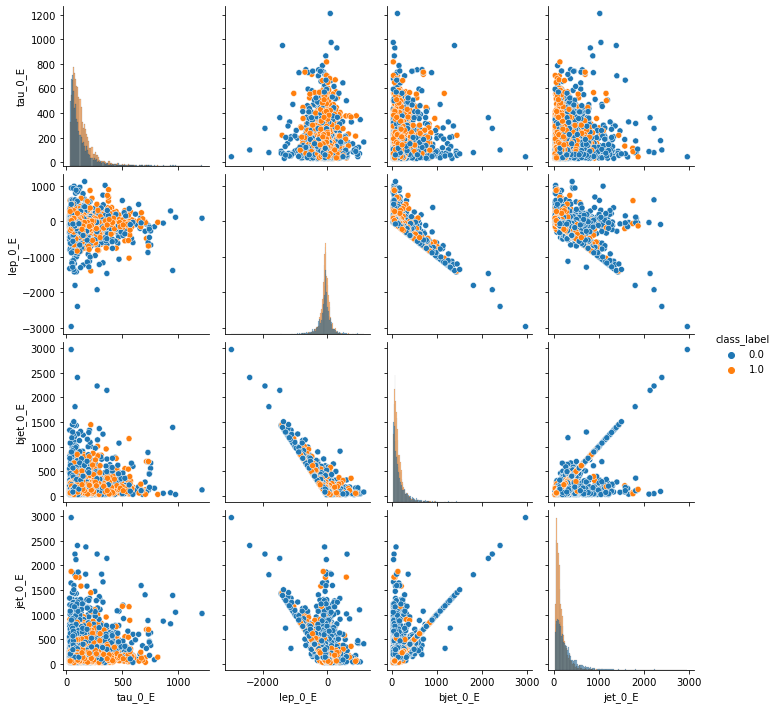

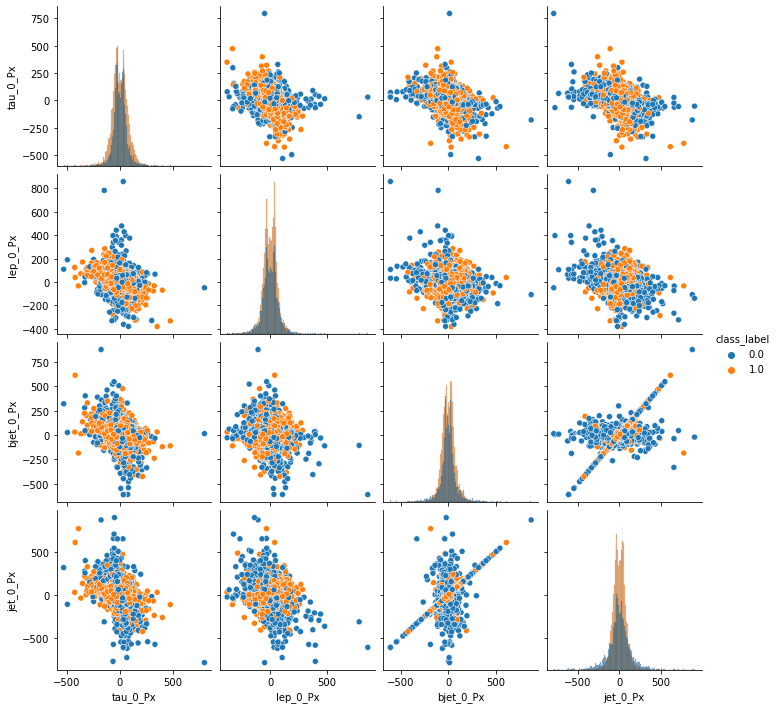

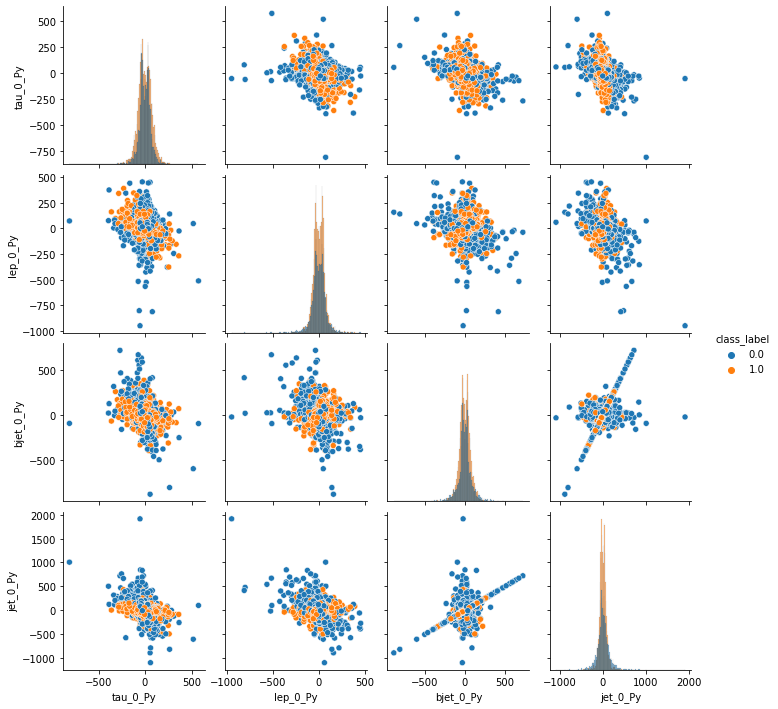

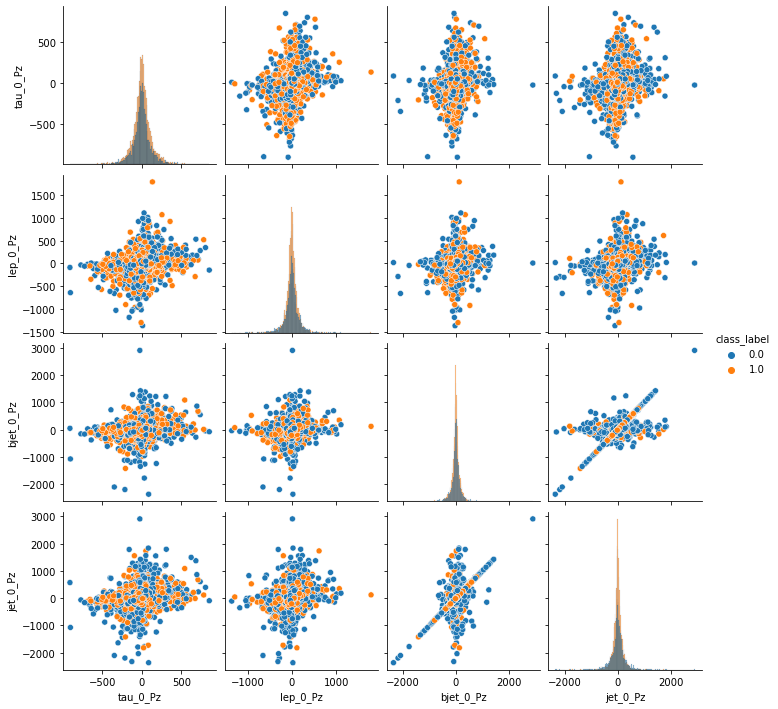

In [12]:
sns.pairplot(df2, vars=['tau_0_E', 'lep_0_E', 'bjet_0_E', 'jet_0_E'], hue='class_label', diag_kind='hist')
sns.pairplot(df2, vars=['tau_0_Px', 'lep_0_Px', 'bjet_0_Px', 'jet_0_Px'], hue='class_label', diag_kind='hist')
sns.pairplot(df2, vars=['tau_0_Py', 'lep_0_Py', 'bjet_0_Py', 'jet_0_Py'], hue='class_label', diag_kind='hist')
sns.pairplot(df2, vars=['tau_0_Pz', 'lep_0_Pz', 'bjet_0_Pz', 'jet_0_Pz'], hue='class_label', diag_kind='hist')